In [2]:
# import all libraries as needed
import numpy  as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Homework 3

(Total: 50pt)

This is an individual assignment.

## Problem 1 (20pt)

For the digital communication system in part 1, problem 1.

1. Implement both MAP and MLE rule as two functions. (10pt)
2. Plot the probability of error given  $P(A_0)$ range from [0,1] under MAP and MLE rules, using different colors. (10pt)

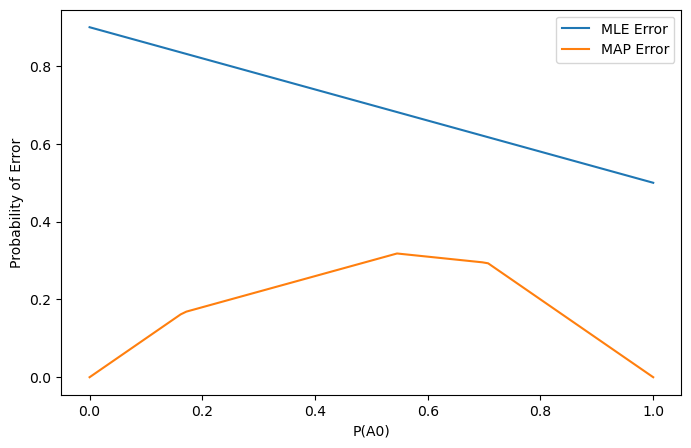

In [38]:
# 1

def MLE(B):
    PB_given_A0 = [0.5, 0.25, 0.25]
    PB_given_A1 = [0.1, 0.3, 0.6]
    if PB_given_A0[B] > PB_given_A1[B]:
        return 0
    else:
        return 1

def MAP(B, PA0, PA1):
    PB_given_A0 = [0.5, 0.25, 0.25]
    PB_given_A1 = [0.1, 0.3, 0.6]
    
    PA0_given_B = PA0 * PB_given_A0[B]
    PA1_given_B = PA1 * PB_given_A1[B]
    PB = PA0_given_B + PA1_given_B

    if PA0_given_B / PB > PA1_given_B / PB:
        return 1
    else:
        return 0

def mle_error(PA0):
    PA1 = 1 - PA0
    PB_given_A0 = [0.5, 0.25, 0.25]
    PB_given_A1 = [0.1, 0.3, 0.6]
    PAs = [PA0, PA1]
    PBs = [PB_given_A0, PB_given_A1]
    
    P_error = sum(PAs[MLE(B)] * PBs[MLE(B)][B] for B in range(3))
    return P_error

def map_error(PA0):
    PA1 = 1 - PA0
    PB_given_A0 = [0.5, 0.25, 0.25]
    PB_given_A1 = [0.1, 0.3, 0.6]
    PAs = [PA0, PA1]
    PBs = [PB_given_A0, PB_given_A1]
    
    P_error = sum(PAs[MAP(B, PA0, PA1)] * PBs[MAP(B, PA0, PA1)][B] for B in range(3))
    return P_error

# 2

PA0_vals = np.linspace(0, 1, 100)
MLE_errors = [mle_error(p) for p in PA0_vals]
MAP_errors = [map_error(p) for p in PA0_vals]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(PA0_vals, MLE_errors, label="MLE Error")
plt.plot(PA0_vals, MAP_errors, label="MAP Error")
plt.xlabel("P(A0)")
plt.ylabel("Probability of Error")
plt.legend();

## problem 2 (10pt)

A pharmaceutical company is testing a new vaccine against a virus. Based on previous studies, the vaccine is known to be 70% effective, meaning that each vaccinated person has a 70% chance of developing immunity.

In a trial, 50 people receive the vaccine.

Simulate the experiment by generating 1,000 random trials and estimate the probability of at least 35 people developing immunity.

In [18]:
numSims = 1000
counter = 0

for i in range(numSims):
    numImmune = 0
    for j in range(50):
        if (random.random() < 0.7):
            numImmune += 1
    if numImmune >= 35:
        counter += 1

print(counter / numSims)

0.556


## Problem 3 (20pt)

A small coffee shop tracks the number of customers arriving per hour. Based on past data, they believe the arrival rate  \lambda  follows one of two possible values:
* Hypothesis 0 ( $H_0$ ): The arrival rate is 5 customers per hour ( $\lambda_0 = 5$ ).
* Hypothesis 1 ( $H_1$): The arrival rate is 10 customers per hour ( $\lambda_1 = 10$ ).

Before observing any data, the shop owner believes that both hypotheses are equally likely:

$P(H_1) = P(H_0) = 0.5$


Given an observed customer count  X = k  in one hour, use MAP estimation to determine which hypothesis is more probable. 

- Implement a python code to decide, given any k, output the decided hypothesis

In [5]:
def hypothesisTest(k):
    lmd0 = 5
    lmd1 = 10
    P = 0.5
    p_obs_H0 = stats.poisson.pmf(k, lmd0)
    p_obs_H1 = stats.poisson.pmf(k, lmd1)
    posteriorH0 = p_obs_H0 * P
    posteriorH1 = p_obs_H1 * P
    if posteriorH1 > posteriorH0:
        return "H1" 
    else:
        return "H0"

k = 10
print(k, ":", hypothesisTest(k))

10 : H1
